Реализуем алгоритм kNN с помощью Python.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

Загрузим один из "игрушечных" датасетов из sklearn.

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

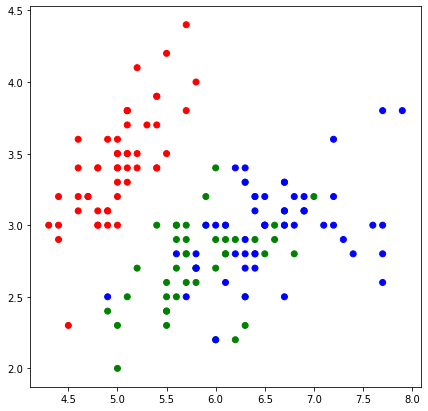

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

In [6]:
def knn(x_train, y_train, x_test, k, q):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes= {class_item: 0 for class_item in set(y_train)}

        # Сортируем список и среди первых k элементов подсчитаем вес в зависимости от расстояния до классифицируемого объекта
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += q**d[0]

            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Напишем функцию для вычисления точности

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [8]:
k = 2
q = 0.5

y_pred = knn(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 2, q = 0.5: 0.733


In [9]:
k = 2
q = 0.1

y_pred = knn(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 2, q = 0.1: 0.733


Построим график распределения классов.

In [15]:
def get_graph(X_train, y_train, k, q):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, q)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

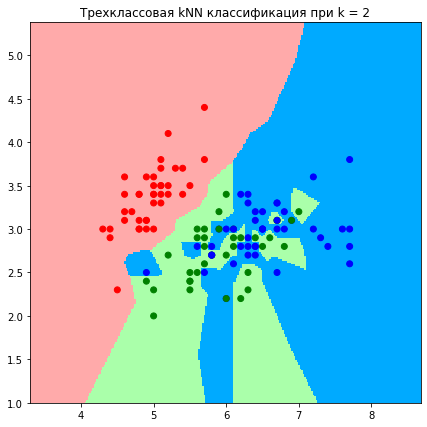

In [16]:
get_graph(X_train, y_train, k, q)

In [19]:
k = 3
q = 0.5

y_pred = knn(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3, q = 0.5: 0.733


In [29]:
k = 5
q = 0.5
y_pred = knn(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5, q = 0.5: 0.867


In [43]:
k = 10
q = 0.5
y_pred = knn(X_train, y_train, X_test, k, q)

print(f'Точность алгоритма при k = {k}, q = {q}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10, q = 0.5: 0.867


Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [30]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=10)

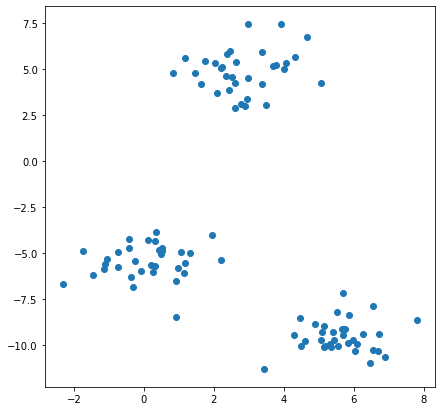

In [31]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [40]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

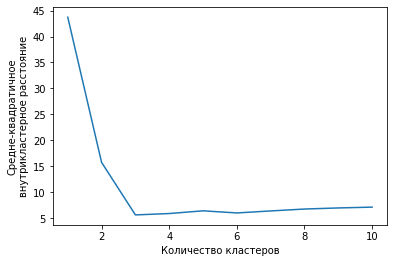

In [41]:
def inter_class_mean_square_distance(centroids, classes):
    result = 0

    for class_index, class_items in classes.items():
        class_square_distance = 0
        
        for x in class_items:
            distance = e_metrics(x, centroids[class_index])
            class_square_distance += distance ** 2

        result += class_square_distance / len(class_items)
        
    return result

max_iterations = 7
min_distance = 1e-4

k_list = np.arange(1, 11, 1)
msd_list = []

for k in k_list:
    centroids, classes = kmeans(X, k, max_iterations, min_distance)
    msd = inter_class_mean_square_distance(centroids, classes)
    msd_list.append(msd)

plt.plot(k_list, msd_list)
plt.xlabel('Количество кластеров')
plt.ylabel('Средне-квадратичное\nвнутрикластерное расстояние')
plt.show()

In [42]:
def mean_square(centroids, clusters):
    mean_square_metric = 0
    j = 0
    for class_i in clusters.keys():
        for x_i in clusters[class_i]: 
            mean_square_metric += ((np.array(centroids[j]) - np.array(x_i)) **2).sum()
        j += 1
    return mean_square_metric